---
# <center>Principal components analysis (continued)</center>
---

In [110]:
import numpy as np
import pandas as pd
from scipy.linalg import svd
#from sklearn.datasets import load_boston

## Load the data

In [111]:
#X, _ = load_boston(return_X_y=True)
#X = pd.DataFrame(X)
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

X = pd.DataFrame(raw_df)
X = X.dropna()
X.head(10)

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
2,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
4,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8
6,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7
8,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7
10,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7
12,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2
14,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2
16,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2
18,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2


## Normalize

In [112]:
X.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000


<Axes: xlabel='6', ylabel='7'>

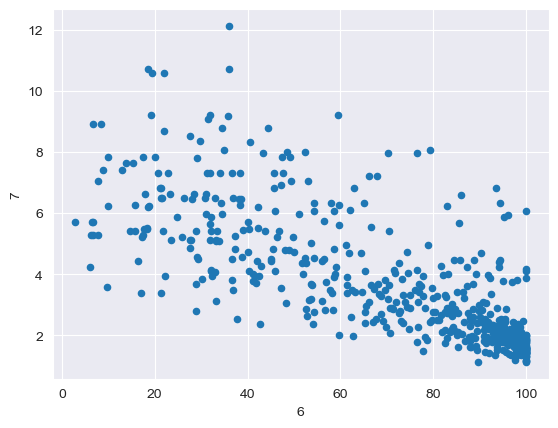

In [113]:
X.plot(kind='scatter',x=6,y=7)

In [114]:
mu = X.mean()
sigma = X.std()
Xnorm = (X - mu)/sigma

<Axes: xlabel='6', ylabel='7'>

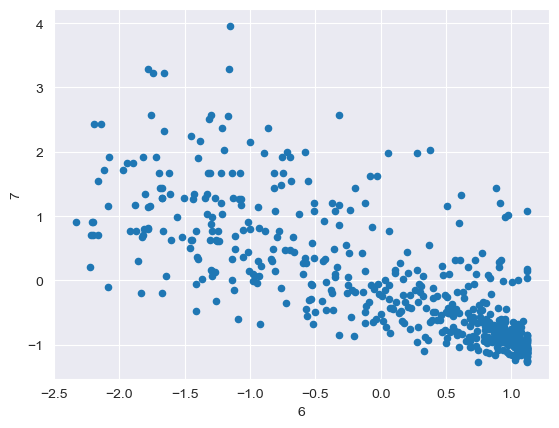

In [115]:
Xnorm.plot(kind='scatter',x=6,y=7)

In [116]:
Xnorm.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02,5.060000e+02
mean,-1.123388e-16,6.319056e-17,2.527622e-16,-7.021173e-17,-1.404235e-16,-9.829643e-17,-1.685082e-16,-1.123388e-16,1.123388e-16,5.616939e-17,-3.370163e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-4.193669e-01,-4.872402e-01,-1.556302e+00,-2.723291e-01,-1.464433e+00,-3.876413e+00,-2.333128e+00,-1.265817e+00,-9.818712e-01,-1.312691e+00,-2.704703e+00
25%,-4.105633e-01,-4.872402e-01,-8.668328e-01,-2.723291e-01,-9.121262e-01,-5.680681e-01,-8.366200e-01,-8.048913e-01,-6.373311e-01,-7.668172e-01,-4.875567e-01
50%,-3.902803e-01,-4.872402e-01,-2.108898e-01,-2.723291e-01,-1.440749e-01,-1.083583e-01,3.170678e-01,-2.790473e-01,-5.224844e-01,-4.642132e-01,2.745872e-01
75%,7.389247e-03,4.872402e-02,1.014995e+00,-2.723291e-01,5.980871e-01,4.822906e-01,9.059016e-01,6.617161e-01,1.659603e+00,1.529413e+00,8.057784e-01
max,9.924110e+00,3.800473e+00,2.420170e+00,3.664771e+00,2.729645e+00,3.551530e+00,1.116390e+00,3.956602e+00,1.659603e+00,1.796416e+00,1.637208e+00


## SVD

In [117]:
U, s, Vt = svd(Xnorm,full_matrices=False)
Sigma = np.diag(s)
V = Vt.T

## Project the data to 4 dimensions

```
lower dimensional subspace 
𝑈𝑟Σ𝑟
```

<img src="Xrr.png" alt="Drawing" style="width: 170px;"/>

In [118]:
r = 4
Ur = U[:,:r]
Sigmar = Sigma[:r,:r]
Xrr = pd.DataFrame(Ur@Sigmar)

In [119]:
# Ur
Ur

array([[-0.03453832,  0.03144321,  0.00604622,  0.04497042],
       [-0.02504192,  0.01959261, -0.03515098,  0.01720647],
       [-0.03303651,  0.02087451, -0.00904109,  0.02876999],
       ...,
       [ 0.00223019,  0.03327289, -0.03776813,  0.02667678],
       [ 0.00207938,  0.0292787 , -0.04328121,  0.02103089],
       [ 0.00360034,  0.0170744 , -0.06723535,  0.00072108]])

In [120]:
#Sigmar
Sigmar

array([[52.06403233,  0.        ,  0.        ,  0.        ],
       [ 0.        , 26.45821501,  0.        ,  0.        ],
       [ 0.        ,  0.        , 23.81460309,  0.        ],
       [ 0.        ,  0.        ,  0.        , 20.66065467]])

In [121]:
Xrr.head(10)

,0,1,2,3
0,-1.798204,0.831931,0.143988,0.929118
1,-1.303784,0.518385,-0.837107,0.355497
2,-1.720014,0.552302,-0.215310,0.594407
3,-2.251694,-0.072964,-0.425126,0.146890
4,-2.189278,0.055717,-0.325947,0.269951
5,-1.946326,-0.101554,-0.886842,-0.032881
6,-1.370980,0.417606,-0.217705,0.482488
7,-1.123207,0.708033,-0.145504,0.708341
8,-0.953008,0.570855,-0.564101,0.470461
9,-1.308117,0.454188,-0.244085,0.502374


# Incorporate new data

<img src="Xnewdata.png" alt="Drawing" style="width: 170px;"/>

In [135]:
newhome = [0.044, 70, 2.24, 0.0, 0.4, 6.87, 47.4, 7.82, 5.0, 358, 14.8,]
newhome_norm = (newhome-mu)/sigma
newhome_projected = newhome_norm @ V[:,:r]
Xrr.loc[len(Xrr)] = newhome_projected

In [136]:
Xrr.tail(10)

,0,1,2,3
498,0.211333,0.269040,-0.891057,0.168323
499,0.428752,0.228965,-1.255280,0.013661
500,0.366601,0.407841,-0.912720,0.255935
501,-0.097368,0.494990,-1.145570,0.202686
502,0.150866,0.468484,-1.527175,0.051397
503,0.116113,0.880341,-0.899433,0.551160
504,0.108261,0.774662,-1.030725,0.434512
505,0.187448,0.451758,-1.601183,0.014898
506,-3.550938,-0.823210,1.641488,0.388780
507,-3.550938,-0.823210,1.641488,0.388780


In [124]:
# newhome_norm
newhome_norm

0    -0.414986
1     2.514159
2    -1.296840
3    -0.272329
4    -1.334986
5     0.833122
6    -0.752247
7     1.911449
8    -0.522484
9    -0.298078
10   -1.688511
dtype: float64

In [125]:
# V[:,:r]
V[:,:r]

array([[ 0.26316849, -0.31301331,  0.3329608 ,  0.02029743],
       [-0.28343621, -0.26221167,  0.43144857, -0.01985503],
       [ 0.37420554,  0.07967995, -0.03964426, -0.01914413],
       [ 0.01367085,  0.48863172,  0.31666383, -0.80802429],
       [ 0.36975032,  0.21376442,  0.0944416 ,  0.15596205],
       [-0.18633288,  0.2013521 ,  0.53942448,  0.3250392 ],
       [ 0.33781529,  0.29260075, -0.0557398 ,  0.18111057],
       [-0.3539033 , -0.32407969,  0.03024121, -0.20571763],
       [ 0.34421803, -0.29090975,  0.33738945, -0.07528714],
       [ 0.36366482, -0.26388179,  0.26868244, -0.04824004],
       [ 0.22056625, -0.39625123, -0.33346702, -0.36446312]])

In [126]:
# newhome_projected
newhome_projected

array([-3.5509382 , -0.82321046,  1.6414881 ,  0.38878043])

In [127]:
Xrr.tail()

,0,1,2,3
502,0.150866,0.468484,-1.527175,0.051397
503,0.116113,0.880341,-0.899433,0.551160
504,0.108261,0.774662,-1.030725,0.434512
505,0.187448,0.451758,-1.601183,0.014898
506,-3.550938,-0.823210,1.641488,0.388780


In [128]:
Xrr.shape

(507, 4)

In [129]:
len(Xrr)

507

In [130]:
Xrr.loc[len(Xrr)-1]

0   -3.550938
1   -0.823210
2    1.641488
3    0.388780
Name: 506, dtype: float64

In [131]:
newhome_projected

array([-3.5509382 , -0.82321046,  1.6414881 ,  0.38878043])

In [132]:
Xrr.loc[len(Xrr)-2]

0    0.187448
1    0.451758
2   -1.601183
3    0.014898
Name: 505, dtype: float64